# Tarea N°4


<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning: Laboratorio 03
*26 de Octubre de 2024*

**Nombre Estudiante(s)**: `Gabriel Álvarez Martínez-Conde - Diego León - Juan Pablo Marín - César Soto


## 1. Objetivo

El objetivo de este trabajo es realizar un análisis exhaustivo de un dataset, que abarque desde la carga y preprocesamiento de los datos hasta la implementación de modelos de aprendizaje supervisado y no supervisado. Se aplicarán técnicas de análisis exploratorio de datos para identificar patrones relevantes y se desarrollarán varios modelos de machine learning para predecir el tipo de vidrio. En particular, se utilizará un modelo no supervisado y al menos dos modelos supervisados, los cuales serán comparados en cuanto a su desempeño.  


## 2. Introducción
El dataset seleccionado continene nueve columnas numéricas que representan la composición de diferentes tipos de vidrios y una columna que indica el tipo de este. El objetivo de este laboratorio es predecir el tipo de vidrio a partir de las características de su composición. Para esto, se utilizarán diferentes modelos de clasificación y se compararán los resultados obtenidos.

En primer lugar se procederá a realizar un análisis exploratorio de los datos, para luego realizar un preprocesamiento de los datos y finalmente entrenar diferentes modelos de clasificación.

Dentro de los modelos de clasificación se considera uno no supervisado y dos supervisados. El modelo no supervisado corresponde a Gaussian Mixtures, mientras que los modelos supervisados corresponden a Random Forest y Gradient Boosting.

Dentro de la exploración de datos se pudo observar que la variable objetivo es desbalanceada, por lo que se procedió a realizar un balanceo de clases utilizando remuestreo aleatorio de las clases minoritarias para entrenar los modelos de clasificación supervisados.  

Finalmente, se presentarán los resultados obtenidos de cada modelo, así como las conclusiones y recomendaciones derivadas del análisis, enfocadas en cómo optimizar las predicciones y posibles aplicaciones del modelo en un contexto práctico.


### Importación de librerías


In [18]:
# pandas: Se utiliza para la manipulación y análisis de datos
import pandas as pd
# numpy: Se utiliza para la manipulación de matrices y operaciones matemáticas
import numpy as np
# matplotlib: Se utiliza para la visualización de datos
import matplotlib.pyplot as plt
# seaborn: Se utiliza para la visualización de datos
import seaborn as sns
# MinMaxScaler: Se utiliza para escalar los datos
from sklearn.preprocessing import MinMaxScaler
# PCA: Se utiliza para reducir la dimensionalidad de los datos
from sklearn.decomposition import PCA
# train_test_split: Se utiliza para dividir los datos en conjuntos de entrenamiento y prueba
# GridSearchCV: Se utiliza para la búsqueda de hiperparámetros
from sklearn.model_selection import train_test_split, GridSearchCV
# accuracy_score: Se utiliza para calcular el accuracy del modelo
# precision_score: Se utiliza para calcular el precision del modelo
# recall_score: Se utiliza para calcular el recall del modelo
# f1_score: Se utiliza para calcular el f1 del modelo
# classification_report: Se utiliza para mostrar un reporte de clasificación
# confusion_matrix: Se utiliza para calcular la matriz de confusión
# ConfusionMatrixDisplay: Se utiliza para mostrar la matriz de confusión
# RandomForestClassifier: Se utiliza para clasificación con Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# GradientBoostingClassifier: Se utiliza para clasificación con Gradient Boosting
# GaussianMixture: Se utiliza para clustering con Gaussian Mixture
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.mixture import GaussianMixture
# LabelEncoder: Se utiliza para codificar etiquetas con valores entre 0 y n_clases-1
from sklearn.preprocessing import LabelEncoder
# linear_sum_assignment: Se utiliza para resolver el problema de asignación lineal
from scipy.optimize import linear_sum_assignment

## 3. Carga de datos y análisis exploratorio

En primer lugar, se realiza la carg de los datos y se muestra una descripción de los mismos.

Se puede observar que existe la columna Id_number que actúa de identificador de cada fila, por lo que se procede a eliminarla.

Por otro lado, se tienen 9 variables numéricas que representan la composición de diferentes tipos de vidrios y una variable categórica que indica el tipo de vidrio. Las variables de composición son las siguientes:

- RI: índice de refracción
- Na: Cantidad de sodio en la composición del vidrio
- Mg: Cantidad de magnesio en la composición del vidrio
- Al: Cantidad de aluminio en la composición del vidrio
- Si: Cantidad de silicio en la composición del vidrio
- K: Cantidad de potasio en la composición del vidrio
- Ca: Cantidad de calcio en la composición del vidrio
- Ba: Cantidad de bario en la composición del vidrio
- Fe: Cantidad de hierro en la composición del vidrio

La variable objetivo es la variable Type_of_glass es una variable categórica con 7 posibles valores, los cuales entran en las siguientes posibilidades:

- 1: Vidrios de ventanas de edificios realizados con proceso de flotación
- 2: Vidrios de ventanas de edificios realizados sin proceso de flotación
- 3: Vidrios de ventanas de vehículos realizados con proceso de flotación
- 5: Vidrios de contenedores
- 6: Vidrios de vajilla
- 7: Vidrios de faros

El dataset contiene 214 registros y no presenta valores nulos.

In [19]:
nombres_columnas = ['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass']
df = pd.read_csv('glass.data', header=None, names=nombres_columnas)
print(f'El dataset posee {df.shape[0]} filas y {df.shape[1]} columnas\n')
print(f'Head del dataset\n{df.head()}\n')
print(f'Información del dataset\n{df.info()}\n')
print(f'Posibles valores de Type_of_glass\n{df["Type_of_glass"].unique()}\n')

El dataset posee 214 filas y 11 columnas

Head del dataset
   Id_number       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0          1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1          2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2          3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3          4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4          5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   

   Type_of_glass  
0              1  
1              1  
2              1  
3              1  
4              1  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al           

A continuación se puede observar que existen 214 registros distintos en la columna Id_number, por lo que se confirma que es un identificador único para cada fila y se procede a eliminarla porque no aporta información relevante para el análisis.

In [20]:
df['Id_number'].nunique()

214

### Descripción del Dataset
- Distribución de los Valores de RI (Índice de Refracción): El valor medio del índice de refracción (RI) es 1.518365 con una desviación estándar muy baja (0.003037), lo que indica que la mayoría de los valores de RI están muy cerca del promedio. Esto sugiere una consistencia en la composición del vidrio en términos de su capacidad para refractar la luz.
- Variedad en la Composición de Na (Sodio): El sodio (Na) tiene un rango amplio de valores, desde un mínimo de 10.73 hasta un máximo de 17.38, con una media de 13.407850. Esta variabilidad puede indicar diferentes tipos de vidrio o diferentes procesos de fabricación que afectan la cantidad de sodio en el vidrio.
- Presencia de Mg (Magnesio) y Al (Aluminio): El magnesio (Mg) tiene un valor mínimo de 0, lo que indica que algunos vidrios no contienen magnesio. Por otro lado, el aluminio (Al) también muestra una variabilidad considerable con un rango de 0.29 a 3.5. La presencia o ausencia de estos elementos puede influir en las propiedades físicas y químicas del vidrio.
- Concentración de Si (Silicio): El silicio (Si) tiene una media de 72.650935 y una desviación estándar de 0.774546, lo que indica que la mayoría de los vidrios tienen una concentración de silicio bastante alta y consistente. Esto tiene sentido, ya que el silicio es un componente principal del vidrio.

In [21]:
df.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


A continuación, a través de un boxplot de cada variable numérica se puede observar las distribuciones de las variables y la presencia de outliers. En especial se puede observar una gran cantidad de outliers en la variable Ba (Bario), Ca (Calcio) y Al (Aluminio). Esto se puede deber a la diferencia en la composición de los diferentes tipos de vidrios.

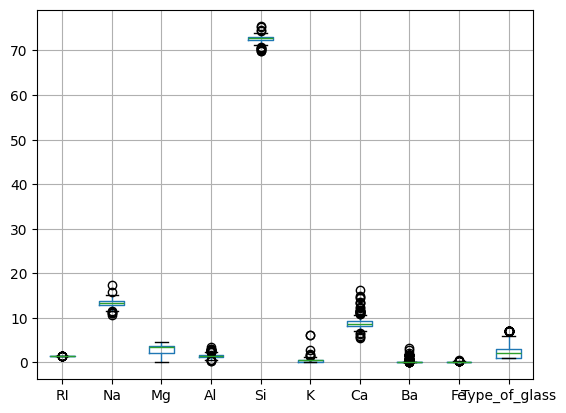

In [22]:
df.iloc[:,1:].boxplot()
plt.show()

A continuación, se realiza un histograma de la variable objetivo para observar la distribución de los tipos de vidrio en el dataset. Se puede observar que los tipos de vidrio 1 y 2 son los más comunes en el dataset, mientras que los tipos de vidrio 3, 5, 6 y 7 son menos comunes. Cabe destacar que no hay registros del tipo de vidrio 4 en el dataset.

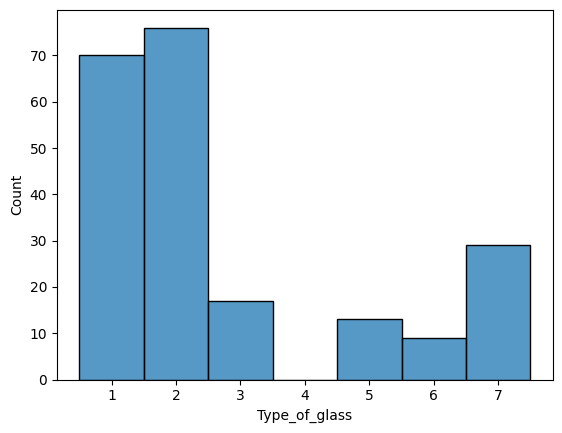

In [23]:
sns.histplot(df,x='Type_of_glass',discrete=True)
plt.show()

In [24]:
# #info desde la medatada. No hay registros del tipo 4
# target_names = {
# 1: 'building_windows_float_processed',
# 2: 'building_windows_non_float_processed',
# 3: 'vehicle_windows_float_processed',
# 4: 'vehicle_windows_non_float_processed (none in this database)',
# 5: 'containers',
# 6: 'tableware',
# 7: 'headlamps' }

## 4. Aplicación de modelos de predicción
En esta sección se procede a entrenar los modelos de clasificación Gaussian Mixtures, Random Forest y Gradient Boosting. Para esto, se realiza la definición de las variables predictoras y la variable objetivo, se realiza un PCA para evaluar la utilización de modelos lineales para la clasificación, luego se entrena el modelo no supervisado Gaussian Mixtures y se evalúa su desempeño. Posteriormente, se realiza un balanceo de clases y se procede a entrenar los modelos supervisados Random Forest y Gradient Boosting.

En primer lugar se definen las variables independientes (X) y la variable dependiente (y). Luego se le aplica un MinMaxScaler a la variable X para normalizar los datos.

In [25]:
# En X se guardan las variables independientes y en y la variable dependiente
X = df[nombres_columnas[1:-1]]
y = df['Type_of_glass']
# Se aplica MinMaxScaler para escalar los datos
normalizador = MinMaxScaler()
X = normalizador.fit_transform(X)


### Evaluación de entrenamiento de modelos lineales
Se realiza un PCA para evaluar la utilización de modelos lineales para la clasificación.

In [26]:
pca = PCA(2,random_state=17)
X_pca = pca.fit_transform(X)
print(f'Original: Filas {X.shape[0]} Columnas {X.shape[1]}\n')
print(f'PCA: Filas {X_pca.shape[0]} Columnas {X_pca.shape[1]}\n')

Original: Filas 214 Columnas 9

PCA: Filas 214 Columnas 2



Luego se grafica un scatter plot de los dos primeros componentes principales coloreando los puntos según el tipo de vidrio. Se puede observar que las categorías parecieran no ser linealmente separables, por lo que se recomienda usar modelos de clasificación no lineales.

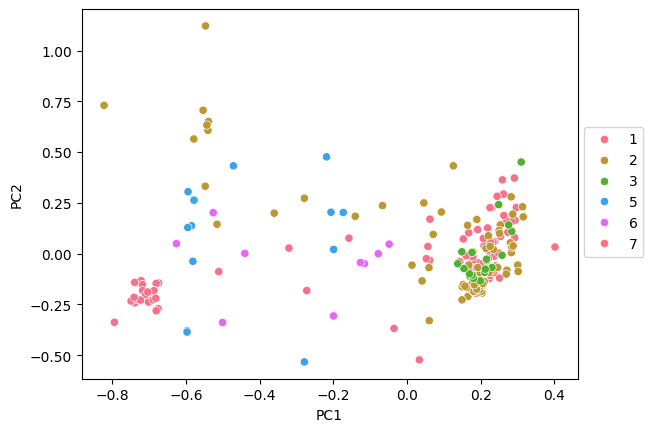

In [27]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Type_of_glass'] = y


sns.scatterplot(
   data=df_pca,
    x='PC1',
    y='PC2',
    hue='Type_of_glass',
    palette='husl'
)
plt.legend(bbox_to_anchor=(1, .7, 0, 0))
plt.show()

### Aplicación de modelo no supervisado

Se codifica la columna objetivo para facilitar la comparación de los clusters

In [29]:
# Se crea un label_encoder para codificar las etiquetas de las clases
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Se inicializa el modelo de Gaussian Mixture con 6 clases debido a que estas son las seis posibilidades de la columna objetivo.

El modelo es entrenado con las columnas independientes y luego se realizan las predicciones con las mismas para obtener los clusters generados

In [30]:
# Se inicializa el modelo de Gaussian Mixture con un número de componentes igual al número de clases en la columna objetivo
n_classes = 6 
gmm = GaussianMixture(n_components=n_classes, random_state=42)
# Entrenar el modelo de GMM con las columnas independientes
gmm.fit(X)
# Se predicen las etiquetas de los clusters para cada columnas independiente del dataset
clusters = gmm.predict(X)

Dado que las etiquetas generadas por GMM pueden no coincidir con las etiquetas reales, se busca la mejor correspondencia en los resultados.

In [31]:
# Se crea una matriz de confusión entre las etiquetas de los clusters y las etiquetas reales
confusion_matrix_gm = np.zeros((n_classes, n_classes), dtype=int)
for i in range(len(y_encoded)):
    confusion_matrix_gm[clusters[i], y_encoded[i]] += 1
# Se utiliza linear_sum_assignment para resolver el problema de asignación lineal
row_ind, col_ind = linear_sum_assignment(-confusion_matrix_gm)
# Se reordenan las predicciones de los clusters de acuerdo con la correspondencia encontrada
new_clusters = np.zeros_like(clusters)
for i, j in zip(row_ind, col_ind):
    new_clusters[clusters == i] = j

Se realizan los cálculos de las métricas de evaluación de los clusters generados. 

En este caso, el modelo tiene bajos valores de las métricas de evaluación, lo que indica que no es un buen modelo para predecir los tipos de vidrios del dataset. 

In [32]:
# Se calcula el accuracy, precision, recall y puntaje f1 entre las etiquetas ajustadas de los clusters y las etiquetas reales de la columna objetivo
accuracy = accuracy_score(y_encoded, new_clusters)
precision = precision_score(y_encoded, new_clusters, average='weighted')
recall = recall_score(y_encoded, new_clusters, average='weighted')
f1 = f1_score(y_encoded, new_clusters, average='weighted')

# Se muestran las métricas de evaluación
print(f"Accuracy del modelo GMM: {accuracy:.2f}")
print(f"Precision del modelo GMM (ponderada): {precision:.2f}")
print(f"Recall del modelo GMM (ponderado): {recall:.2f}")
print(f"F1 del modelo GMM (ponderado): {f1:.2f}")

Accuracy del modelo GMM: 0.44
Precision del modelo GMM (ponderada): 0.42
Recall del modelo GMM (ponderado): 0.44
F1 del modelo GMM (ponderado): 0.42


Se genera y grafica la matriz de confusión para visualizar los resultados obtenidos.

En ella se puede observar que la mayoría de los datos predichos se encuentran en las etiquetas 1, 2 y 7, mientras que el resto de las etiquetas tienen pocos datos predichos. Esto sugiere que los clusters generados no logran separar de manera adecuada los datos.

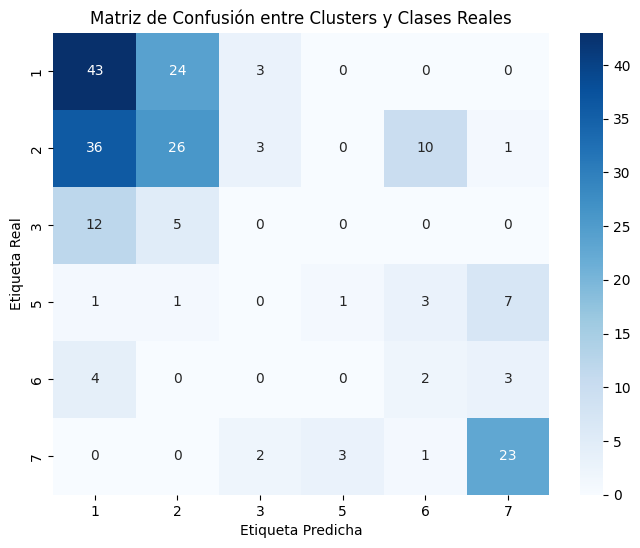

In [33]:
# Se crea una matriz de confusión entre las etiquetas reales y las etiquetas ajustadas de los clusters
cm = confusion_matrix(y_encoded, new_clusters)

# Se crea una visualización de la matriz de confusión utilizando sns.heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Se añaden etiquetas y títulos para una mejor comprensión
plt.title("Matriz de Confusión entre Clusters y Clases Reales")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

### Aplicación de modelos supervisados

Se crea una función personalizada para realizar la matriz de confusión

In [34]:
def custom_confusion_matrix(y_test, y_pred, display_labels):
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = confusion_matrix(y_test, y_pred, normalize = 'true')

  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
  disp.plot(cmap=plt.cm.Blues, ax = ax[0])

  disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=display_labels)
  disp.plot(cmap=plt.cm.Blues, ax = ax[1])

  ax[0].set_title("Non-normalized confusion matrix")
  ax[1].set_title("Normalized confusion matrix")
  plt.tight_layout()

Se observan las cantidades desbalanceadas de las clases, por lo que se procede a realizar un balanceo de clases utilizando remuestreo aleatorio de las clases minoritarias.

In [38]:
print(f'Conteo de valores de Type_of_glass\n{df["Type_of_glass"].value_counts()}\n')
print(f'Conteo de valores de Type_of_glass normalizado\n{df["Type_of_glass"].value_counts(normalize = True)}\n')

Conteo de valores de Type_of_glass
Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

Conteo de valores de Type_of_glass normalizado
Type_of_glass
2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: proportion, dtype: float64



Se divide el dataset en un conjunto de entrenamiento y un conjunto de prueba y se realiza un balanceo de clases sólo en el conjunto de entrenamiento. 

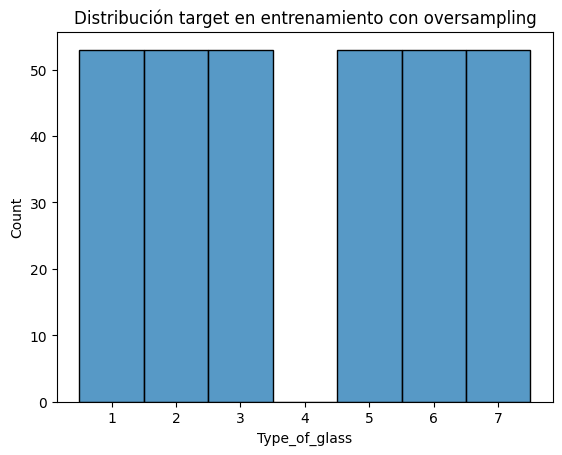

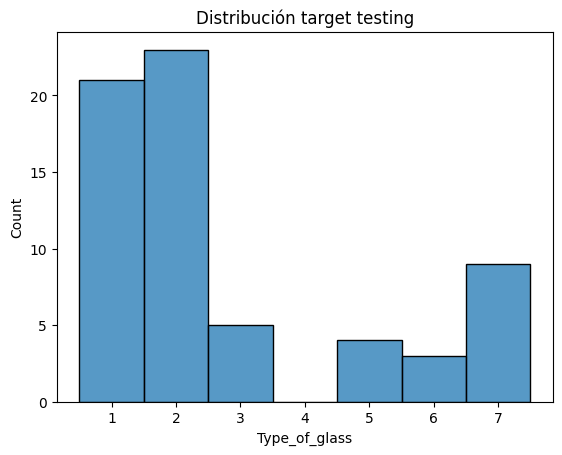

In [40]:
# X = pd.DataFrame(X)
df['Type_of_glass'] = y.astype(int).values
# df.columns = [col for col in df.columns if col not in ["Id_number"]]
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42, stratify=y)

df_aux = pd.DataFrame()
frecuencias = X_train['Type_of_glass'].value_counts().to_dict()
frecuencias = list(frecuencias.items())
mayor_cat = frecuencias[0][0]
mayor_cant= frecuencias[0][1]
for categoria,cantidad in frecuencias[1:]:
    filtro = X_train['Type_of_glass'] == categoria
    df_temp = X_train[filtro].sample(
        n=mayor_cant-cantidad, 
        replace=True, 
        random_state=17, 
        axis=0, 
        ignore_index=True
    )
    df_aux = pd.concat([df_aux, df_temp],ignore_index=True)
X_train = pd.concat([X_train, df_aux],ignore_index=True)


sns.histplot(X_train, x='Type_of_glass', discrete=True)
plt.title("Distribución target en entrenamiento con oversampling")
plt.show()

sns.histplot(X_test, x='Type_of_glass', discrete=True)
plt.title("Distribución target testing")
plt.show()

y_train = X_train['Type_of_glass']
y_test = X_test['Type_of_glass']
X_train.drop(['Type_of_glass'], axis = 1, inplace=True)
X_test.drop(['Type_of_glass'], axis = 1, inplace=True)



Se usa GridSearchCV para el tune de hiper-parámetros, donde se entrega una grilla de posibles hiper-parámetros y recorre cada modelo posible usando validación cruzada de 3 particiones. Internamente, lo que realiza es entrenar con diferentes usando 2 particioners y testear con la restante usando una métrica de score definida por el usuario. En este caso, se usa neg_log_loss la cual penaliza predicciones de alta probabilidad que sean incorrectas, la cual se elige por sobre accuracy, ya que se posee un cierto nivel de desbalance en los datos

In [22]:
clf_rf = RandomForestClassifier(random_state=42, bootstrap=True)

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tune de hiper-parámetros
model_random_forest = GridSearchCV(estimator=clf_rf, param_grid=param_grid, 
                           scoring='neg_log_loss', cv=3, verbose=2, n_jobs=-1)

model_random_forest.fit(X_train, y_train)
preds_random_forest = model_random_forest.predict(X_test)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Users\Diego\anaconda3\envs\udd_python_proyecto\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [23]:
model_random_forest.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)

In [24]:
clf_gb = GradientBoostingClassifier(random_state=42)

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [1, 0.1]
}

# Tune de hiper-parámetros
model_gradient_boosting = GridSearchCV(estimator=clf_gb, param_grid=param_grid, 
                           scoring='neg_log_loss', cv=3, verbose=2, n_jobs=-1)

model_gradient_boosting.fit(X_train, y_train)
preds_gradient_boosting = model_gradient_boosting.predict(X_test)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\Diego\anaconda3\envs\udd_python_proyecto\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [25]:
model_gradient_boosting.best_estimator_

GradientBoostingClassifier(max_depth=30, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=50,
                           random_state=42)

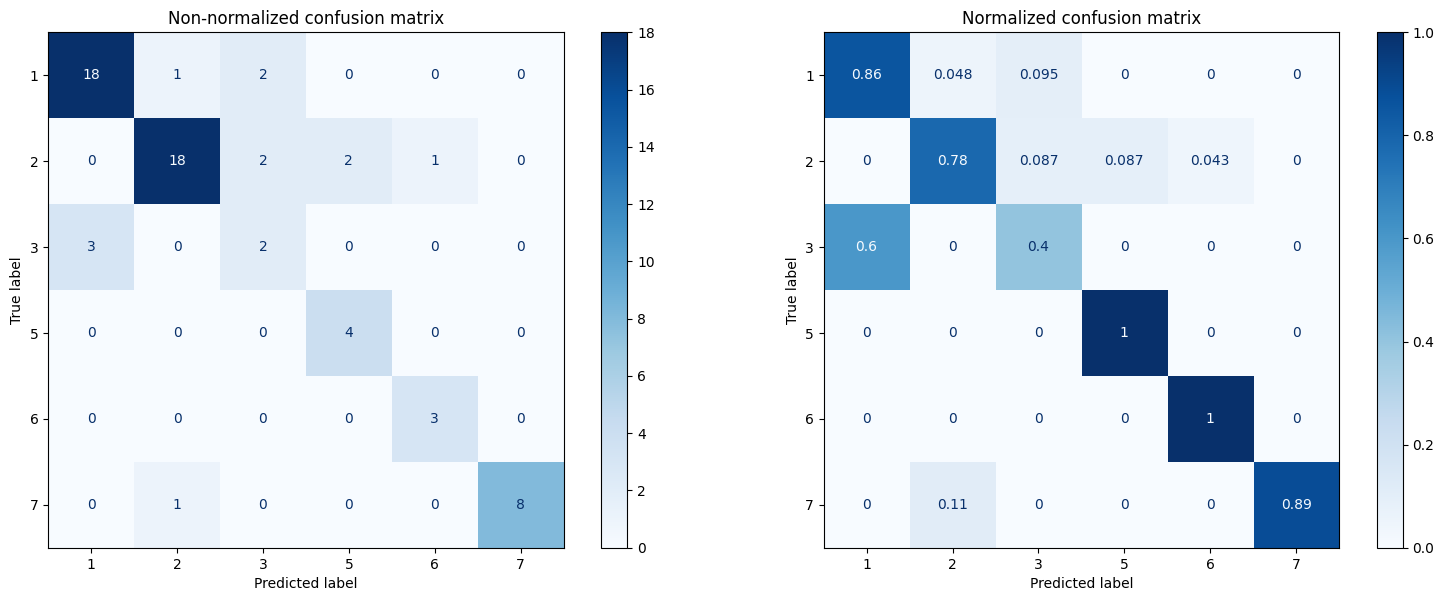

In [28]:
custom_confusion_matrix(y_test, preds_random_forest, ["1", "2", "3", "5", "6", "7"])

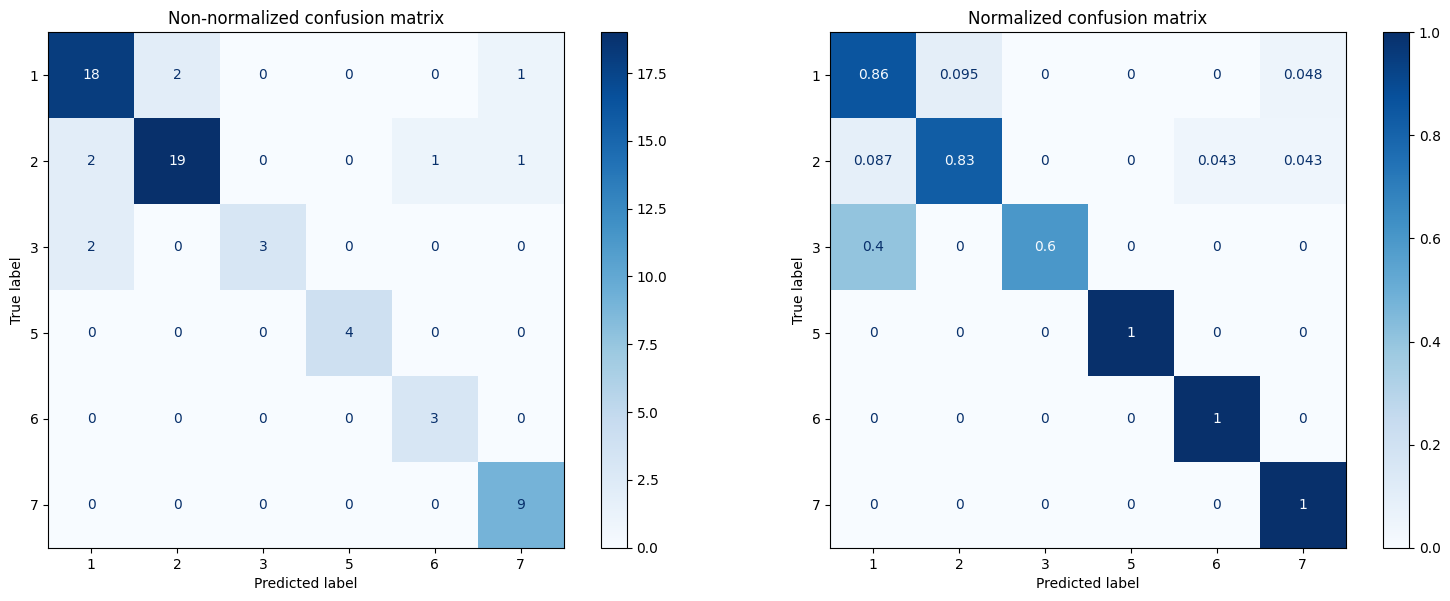

In [29]:
custom_confusion_matrix(y_test, preds_gradient_boosting, ["1", "2", "3", "5", "6", "7"])

In [30]:
print(classification_report(y_test, preds_random_forest))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        21
           2       0.90      0.78      0.84        23
           3       0.33      0.40      0.36         5
           5       0.67      1.00      0.80         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.82        65
   macro avg       0.75      0.82      0.78        65
weighted avg       0.84      0.82      0.82        65



In [31]:
print(classification_report(y_test, preds_gradient_boosting))

              precision    recall  f1-score   support

           1       0.82      0.86      0.84        21
           2       0.90      0.83      0.86        23
           3       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         4
           6       0.75      1.00      0.86         3
           7       0.82      1.00      0.90         9

    accuracy                           0.86        65
   macro avg       0.88      0.88      0.87        65
weighted avg       0.87      0.86      0.86        65

